In [8]:
#import PyCall
using PyCall
#add path to the local director
pushfirst!(PyVector(pyimport("sys")["path"]), "")
# import the python module
pyFun = PyCall.pyimport("pyFunction");
# call the python function
pyFun.hello_from_py()
x=zeros(10);
pyData=PyCall.pyimport("read20220208")

Hello from Python!


PyObject <module 'read20220208' from '/Users/mgrecu/AOS/Synergy_KuW/airborne/read20220208.py'>

In [21]:
# the equivalent of python dir is in julia names
#(pyData.dir())
using Pkg
Pkg.add("PyPlot")   
using PyPlot

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed PyPlot ─ v2.11.2
    Updating `~/.julia/environments/v1.8/Project.toml`
  [d330b81b] + PyPlot v2.11.2
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [d330b81b] + PyPlot v2.11.2
Precompiling project...
  ✓ PyPlot
  1 dependency successfully precompiled in 2 seconds. 238 already precompiled. 1 skipped during auto due to previous errors.


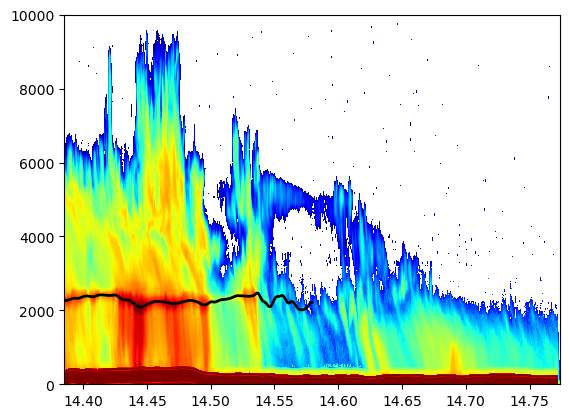

(0.0, 10000.0)

In [31]:
pcolormesh(pyData.timeL,pyData.height,pyData.zKu[:,end:-1:1]',cmap="jet",vmin=-10,vmax=45)
plot(pyData.timeL[1:pyData.nx2],pyData.hL_filtered,color="k",linewidth=2)
ylim(0,10000)

(2800, 433)Matrix{Float64}

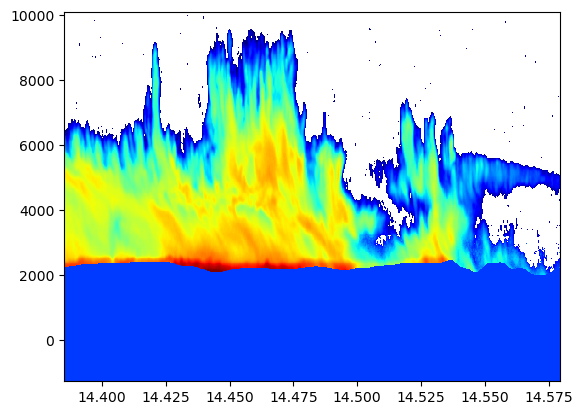

PyObject <matplotlib.collections.QuadMesh object at 0x292848850>

In [52]:
scTables=PyCall.pyimport("lkTables")
lkTables=scTables.scattTables()
nx=size(pyData.hL_filtered)[1]
print(size(pyData.zKu))
zKaRet=zeros(nx,433)
print(typeof(zKaRet))
zKuJ=(pyData.zKu[:,end:-1:1])
height=(pyData.height)
hL_filtered=(pyData.hL_filtered)
for i in range(1,nx)
    zKu1=zKuJ[i,:]
    for j=1:433
        if height[j]>hL_filtered[i]
            zKaRet[i,j]=zKu1[j]
        else
            break
        end
    end
end
pcolormesh(pyData.timeL[1:nx],pyData.height,zKaRet',cmap="jet",vmin=-10,vmax=45)

In [48]:
print(pyData.height[1:10])

[10091.650000000001, 10065.400000000001, 10039.150000000001, 10012.900000000001, 9986.650000000001, 9960.400000000001, 9934.150000000001, 9907.900000000001, 9881.650000000001, 9855.400000000001]

In [38]:
#print(lkTables.dmr)
# import function from bisection.jl
include("bisection.jl")

bisection (generic function with 1 method)